## Regularización

La regularización es una estrategia para delimitar el numero de variables de entrada con el fin de reducir la dimensionalidad del problema y de esta forma mejorar el rendimiento y el tiempo de entrenamiento del modelo. 

*Regularización "Cualquier modificación que realicemos en un algoritmo de aprendizaje y que tenga la intención de reducir su error de prueba, pero no su error de entrenamiento"  Ian Goodfellow et al. (Deep Learning, Cambridge, MA, MIT Press, 2016)*

La regularización consiste en añadir una penalización a la función de coste. Esta penalización produce modelos más simples que generalizan mejor y especialmente se utiliza para evitar el sobreaprendizaje

#### El problema del overfitting

El sobreajuste (overfitting) aparece cuando un modelo es muy complejo y se ajusta demasiado bien a los ejemplos de entrenamiento pero mal a los de test (no hay generalización) 

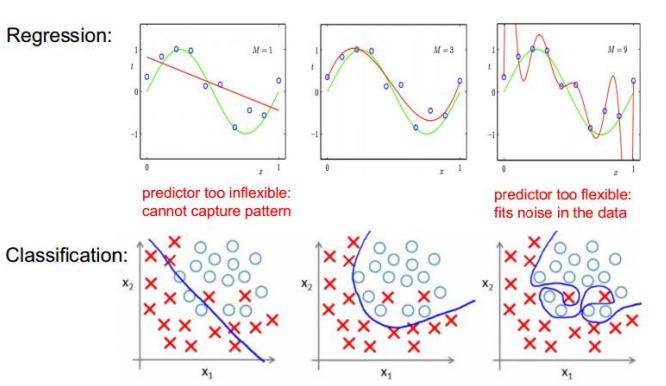

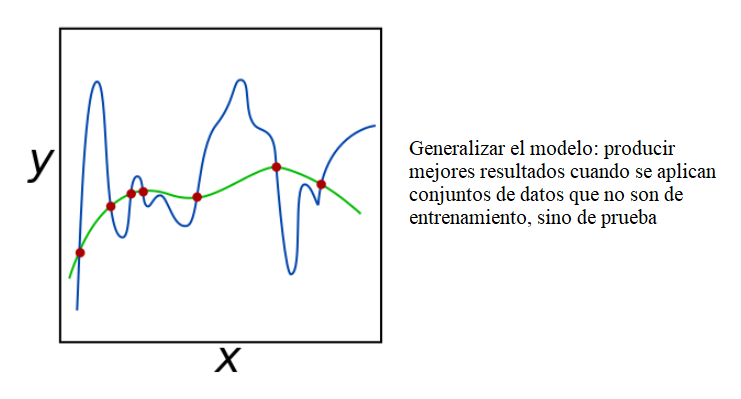

### ¿Cómo funciona la regularización?

Cuando vimos el gradiente descendiente, usamos el error cuadrático medio como función de coste J.

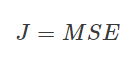

Cuando usamos regularización, se añade un término que penaliza la complejidad del modelo. En el caso del MSE, se tiene:
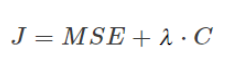

C es la medida de complejidad del modelo. Dependiendo de cómo se mide la complejidad, se tendra distintos tipos de regularización. El hiperparámetro λ indica cómo de importante es para nosotros que el modelo sea simple en relación a cómo de importante es su rendimiento.

### ¿Porqué funciona la regularización?

Cuando se usa la regularización,se minimiza la complejidad del modelo a la vez que se minimiza la función de coste. Esto resulta en modelos más simples que tienden a generalizar mejor. Lo modelos que son excesivamente complejos tienden a sobreajustar. Es decir, a encontrar una solución que funciona muy bien para los datos de entrenamiento pero muy mal para datos nuevos.  Nos interesan los modelos que además de aprender bien, también funcionen tengan un buen rendimiento con datos nuevos.

### Norma Lp

Antes de abordar la regulraizacion L1 y L2, es necesario introducir la notacion Lp, donde se define de un vector x con xi componentes como:

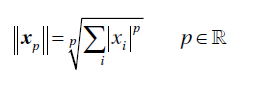

### Regularización L2

La regularizacion L2 (o Ridge) consiste en agregar un término para la función de costo que tiene el objetivo de reducir efectivamente la capacidad de la red para adaptarse a conjuntos de datos complejos.

la complejidad C se mide como la media del cuadrado de los coeficientes del modelo. La regularización Ridge se puede aplicar a varias técnicas de aprendizaje automático. Matemáticamente quedaría:

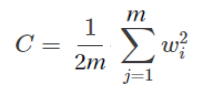

Para el caso del error cuadrático medio:

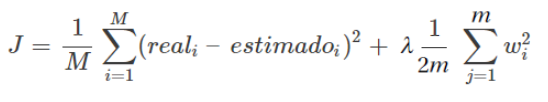

Donde, w es el vector de todos los pesos de la red, inlcuyendo el valor de sesgo o bias, N es el numero de observaciones y λ es el parametro de regularización, o en terminos generales se tiene:

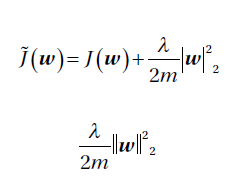

Donde se define una nueva funcion de coste que no es mas que la norma L2 multiplicado por un parametro de regularización

Entendiendo de forma intuitiva se tiene para la actualizacion de los pesos como:

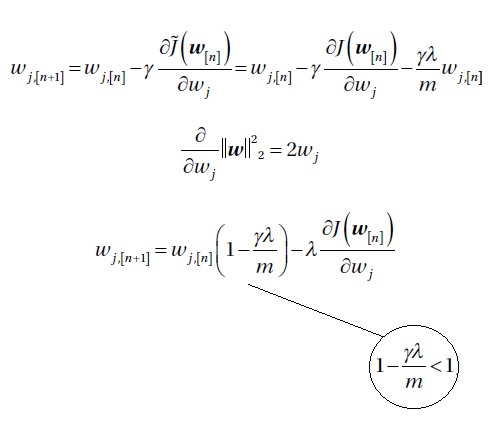


Esta es la ecuación para la actualización de pesos. La diferencia con GD simple es que, el peso wj es multiplicada por una constante, por lo que se cambia efectivamente los valores de peso durante la actualización hacia cero, haciendo que la red sea menos compleja (intuitivamente).

¿Cómo elegir λ? es necesario ver lo que sucede al variar el parámetro λ a su métrica de optimización. En la Figura se puede ver el comportamiento de los conjuntos de datos MSEtrain (línea continua) y MSEdev (discontinuo) donde se varía λ.

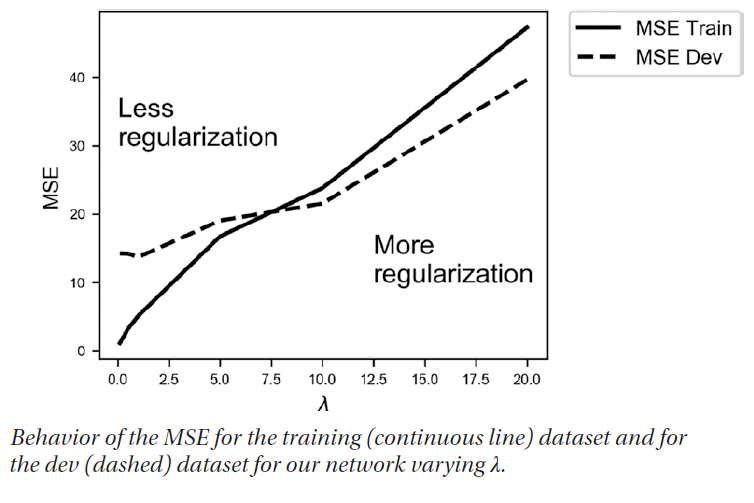

Una forma de estimar el valor óptimo del parámetro de regularización λ es trazar su métrica de optimización (en este ejemplo, el MSE) para los conjuntos de datos de entrenamiento y prueba y observar cómo se comportan para varios valores de λ. Luego, se elije un valor que le brinde un modelo que ya no se adapta a los datos de entrenamiento.


In [ ]:
from keras import regularizers
model.add(Dense(64, input_dim=64,
                kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))


keras.regularizers.l1(0.)
keras.regularizers.l2(0.)
keras.regularizers.l1_l2(l1=0.01, l2=0.01)

Las regularizaciones son aplicadas dependiendo del tipo de capas que pueden ser: Dense, Conv1D, Conv2D y Conv3D 

#### ¿Cuándo es efectiva Ridge (L2)?

Ridge nos va a servir de ayuda cuando sospechemos que varios de los atributos de entrada estén correlacionados entre ellos. Ridge hace que los coeficientes acaben siendo más pequeños. Esta disminución de los coeficientes minimiza el efecto de la correlación entre los atributos de entrada y hace que el modelo generalice mejor. Ridge funciona mejor cuando la mayoría de los atributos son relevantes.

### Regularización L1

En la regularización L1 (Lasso), la complejidad C se mide como la media del valor absoluto de los coeficientes del modelo. Esto se puede aplicar a regresiones lineales, polinómicas, regresión logística, redes neuronales, máquinas de vectores de soporte, etc. Matemáticamente quedaría:

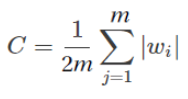

Para el caso del error cuadrático medio, este es el desarrollo completo para Lasso (L1):
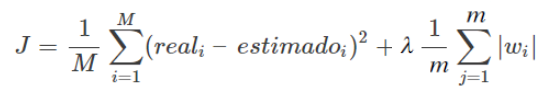

En terminos generales se tiene:

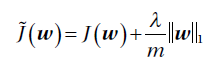


In [ ]:
# example of l1 norm on activity from a dense layer 
# The example below sets l1 norm activity regularization on a Dense fully connected layer.
from keras.layers import Dense
from keras.regularizers import l1

model.add(Dense(32, activity_regularizer=l1(0.001)))

In [ ]:
# example of l1 norm on activity from a cnn layer
# The example below sets l1 norm activity regularization on a Conv2D convolutional layer.
from keras.layers import Conv2D
from keras.regularizers import l1

model.add(Conv2D(32, (3,3), activity_regularizer=l1(0.001)))

In [ ]:
# example of l1 norm on activity from an lstm layer
# The example below sets l1 norm activity regularization on an LSTM recurrent layer.
from keras.layers import LSTM
from keras.regularizers import l1

model.add(LSTM(32, activity_regularizer=l1(0.001)))

#### ¿Los pesos en realidad decaen a 0?

Consideramos la ecuacion de actualiacion de pesos obtenida anteriormente:

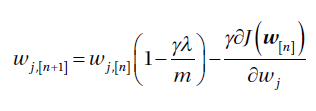

Necesitamos encontrar el minimot en la region donde ka funcion de costo J es casi 0, luego se tiene:

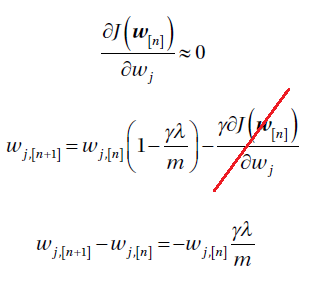

Donde al reordenar los parametros, ahora se puede ver que la ecuacion es la tasa de variacion de los pesos respecto al numero de iteraciones, esta ecuacion se asimila a una ecuacion diferencial:

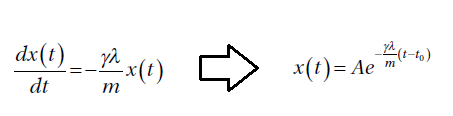

Donde al graficar se puede ver que la disminución de peso tendrá una disminución similar a la de una función exponencial.

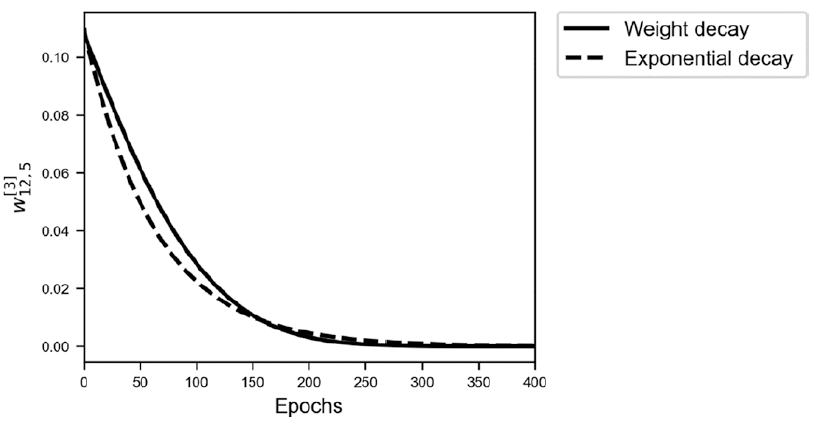

#### ¿Cuándo es efectiva Lasso (L1)?

Lasso servirá cuando sospechemos que varios de los atributos de entrada son irrelevantes. Al usar la regularización Lasso, estamos fomentando que la solución sea poco densa. Es decir, favorecemos que algunos de los coeficientes acaben valiendo 0. Esto puede ser útil para descubrir cuáles de los atributos de entrada son relevantes y, en general, para obtener un modelo que generalice mejor. 

Lasso nos puede ayudar, en este sentido, a hacer la selección de atributos de entrada. Lasso funciona mejor cuando los atributos no están muy correlacionados entre ellos.

### Regularización ElasticNet (L1 y L2)

ElasticNet combina las regularizaciones L1 y L2. Con el parámetro r se puede indicar que importancia relativa tienen Lasso y Ridge respectivamente. 

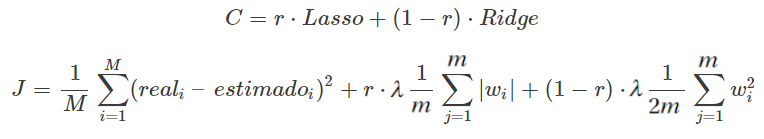

#### ¿Cuándo es efectiva ElasticNet?

Se usa ElasticNet cuando se tiene un gran número de atributos. Algunos de ellos serán irrelevantes y otros estarán correlacionados entre ellos.

### Dropout

Esta técnica consiste en que al tener cada nueva entrada a la red en fase de entrenamiento, se desactivará aleatoriamente un porcentaje de las neuronas en cada capa oculta, acorde a una probabilidad de descarte previamente definida. Dicha probabilidad puede ser igual para toda la red, o distinta en cada capa.

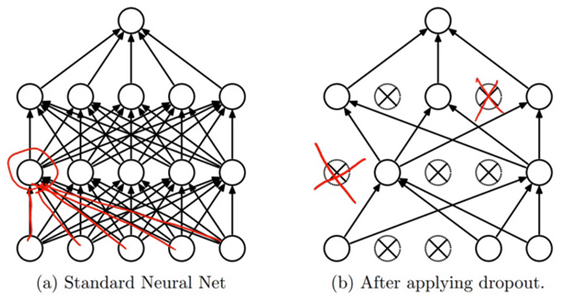

lo que se consigue es que ninguna neurona memorice parte de la entrada, para evitar tener un sobreajuste.

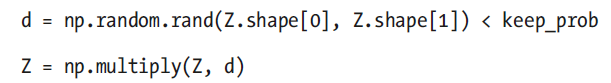

El dropout puede ser a una capa específica. Por ejemplo, para capas con muchas neuronas, keep_prob puede ser pequeño. Para las capas con pocas neuronas, se puede establecer keep_prob = 1.0, manteniendo todas las neuronas en dicha capa.

### Early stopping (Parada temprana)

Este método no hace nada para evitar el sobreajuste, simplemente detiene el aprendizaje antes de que el problema de sobreajuste se vuelva demasiado malo. Se considera las curvas para MSEtrain y MSEdev donde se limita el punto donde empezaria a aumentar el error

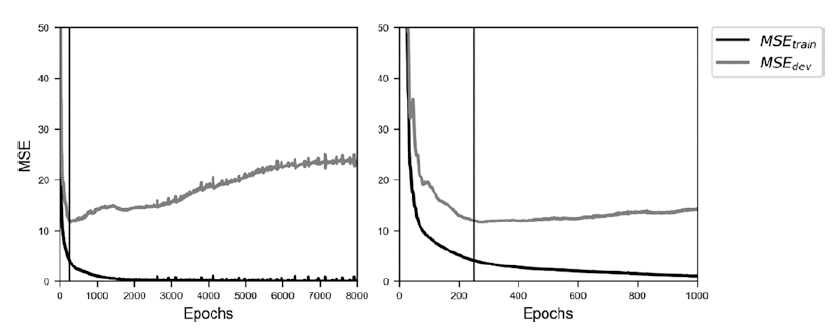


### Metodo Adicional: Data augmentation

Consiste en aplicar diversas transformaciones sobre las entradas originales, obteniendo muestras ligeramente diferentes pero iguales en esencia, lo que permite a la red desenvolverse mejor en la fase de inferencia.

Esta técnica se utiliza mucho en el campo de la visión artificial ya que funciona de muy bien. Lo que se hace es aplicar transformaciones de forma aleatoria cada vez que se vuelva a introducir la imagen a la red.

Ejemplos de transformaciones:
- Voltear la imagen en horizontal / vertical
- Rotar la imagen X grados
- Recortar, añadir relleno, redimensionar
- Aplicar deformaciones de perspectiva
- Ajustar brillo, contraste, saturación
- Introducir ruido, defectos
- Combinaciones de las anteriores

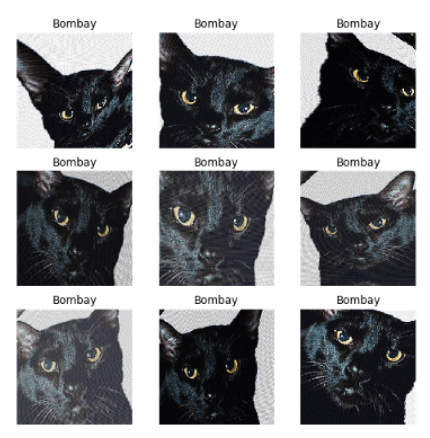

### Análisis de Métricas

Una métrica es una función que se utiliza para juzgar el rendimiento de un modelo. Las funciones de métricas se deben suministrar en el parámetro metrics cuando se compila un modelo.

Una función métrica es similar a una función de pérdida, excepto que los resultados de la evaluación de una métrica no se utilizan al entrenar el modelo.

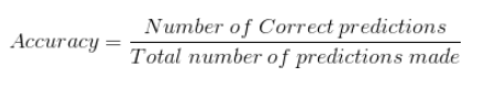

#### Human-Level Performance

Se puede definir como el valor mas bajo para el error ϵ que puede ser alcanzado por un grupo de personas cuando se realiza una tarea de clasificación

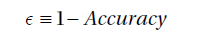


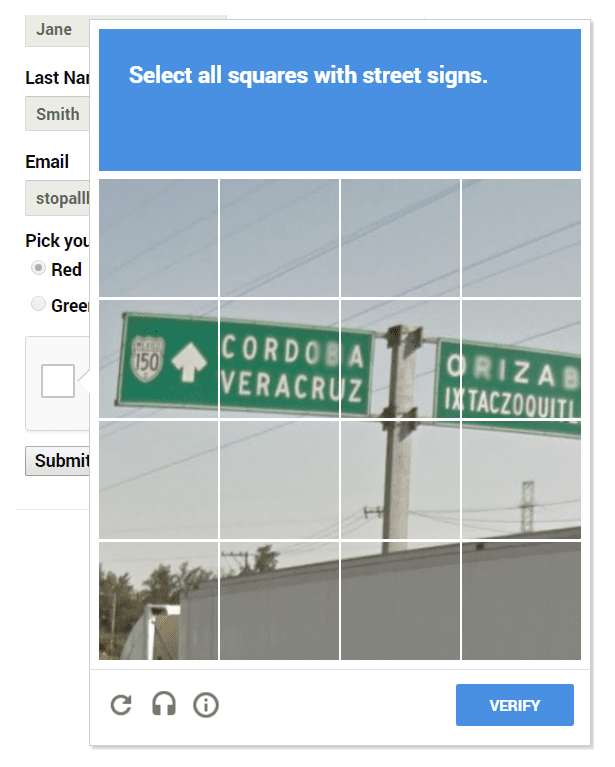

El analisis de Métricas consiste en colocar una serie de procedimientos que daran informacion de como el modelo esta trabajando y si los datos son buenos o malos, evaluando con las metricas de optimizacion de distintos datasets.

### Bias

Se quiere saber si nuestro modelo tiene un alto bias con respecto al nivel de desempeño de un humano. donde:

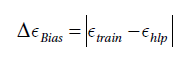

Entre mas grande es el ΔϵBias, mas bias tiene el modelo. En este caso se requiere tener una mejor configuracion de entrenamiento para obtener mejores resultados con la data de entrenamiento

Las tecnicas mas utilizadas para reucir el bias son:
- Redes grandes (mas capas y neuronas)
- Arquitecturas mas complejas (convolutional neural networks)
- Entreanr el modelo mas tiempo (más epocas)
- Usar mejores optimziadores (Adam)
- Haciendo mejor busqueda de hiperparametros

### Training Set Overfitting (Conjunto de entrenamiento de sobreajuste)

Queremos cuantificar cuando existe sobreajuste en el modelo cuando se tiene el error del modelo con los datos de entrenamiento ϵtrain y el erro con los datos de prueba ϵdev. Podemos decir que estamos sobreajustando el sistema cuando ϵtrain ≪ ϵdev.

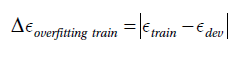

- ϵtrain: El error de el clasificador de nuestro dataset de entenamiento
- ϵdev: El error de el clasificador de un segundo conjunto de datos que utilizamos para verificar el sobreajuste en el conjunto de datos de entrenamiento

### Test set

Puede suceder que los modelos funcionen bien en el conjunto de datos de desarrollo, pero no se generalicen en absoluto, porque selecciona los mejores valores utilizando solo el conjunto de datos de desarrollo. Se corre el riesgo de sobreajustar el conjunto de datos de desarrollo al elegir valores específicos para sus hiperparámetros. 

Para verificar si este es el caso, se crea un tercer conjunto de datos, llamado conjunto de datos de prueba (test set), cortando una parte de las observaciones de su conjunto de datos inicial, que utiliza para verificar el rendimiento del modelo.

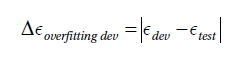

donde ϵtest es el error evaluado en el conjunto de prueba.

### ¿Cómo dividir el conjunto de datos?

Por lo general, en deep learning, se trabajan con grandes conjuntos de datos. Por ejemplo, si se tiene m = 10^6, podríamos usar una división como 98/1/1. donde el 1% de 10^6 es 10^4, luego, el conjunto de dev/test debe ser lo suficientemente grande como para dar una alta confianza al rendimiento del modelo, además, se querrá guardar tantas observaciones como sea posible para su conjunto de entrenamiento.

#### Cuando se tiene distribucion de clases desequilibradas

Al dividir su conjunto de datos en problemas complejos, se debe prestar especial atención no solo a la cantidad de observaciones que tiene el conjuntos de datos, sino también a las observaciones que se elijen y a la distribución de las clases.

cómo lidiar con los conjuntos de datos desequilibrados

- Cambiar la métrica: es posible que desee usar algo más que precisión, ya que puede ser engañoso. Como intentar usar la matriz de confusión o F1. Otra forma importante de verificar cómo está funcionando el modelo.
- Trabajar con un conjunto de datos con submuestreo. Por ejemplo, tiene 1000 observaciones en la clase 1 y 100 en la clase 2, puede crear un nuevo conjunto de datos con 100 observaciones aleatorias en la clase 1 y las 100 que tiene en la clase 2. Sin embargo, el problema con este método es que se tendrán muchos menos datos para alimentar al modelo para entrenarlo.
- Trabajar con un conjunto de datos sobremuestreado. Se puede tomar las 100 observaciones en la clase 2 mencionadas anteriormente y simplemente replicarlas 10 veces, para terminar con 1000 observaciones en clase 2 (muestreo con reemplazo).
- Intentar obtener más datos en la clase con menos observaciones: esto no siempre es posible. 

### Precision, Recall y F1

Estas métricas son muy útiles cuando se trata de conjuntos de datos desbalanceados. Consideremos el siguiente ejemplo. 
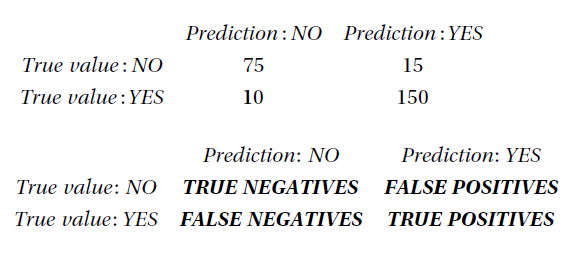
Donde se realizan algunas pruebas para determinar si un sujeto tiene una determinada enfermedad o no. Donde N = 250 resultados de prueba. Podemos expresar varias métricas como funciones de los términos de la matriz de confusion:

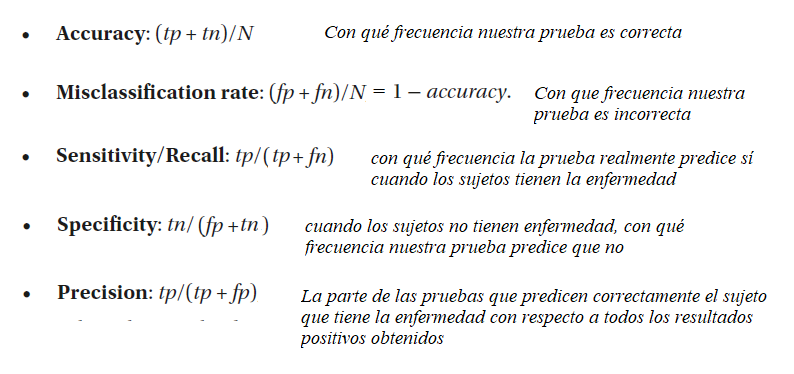
Hay otra métrica que es importante saber, y ese es el puntaje F1. Que se define como:

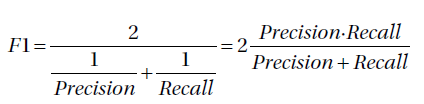
El puntaje F1 generalmente es útil, porque como métrica, desea un solo número y, de esta manera, no tiene que decidir entre precision o recall, ya que ambos son útiles. y se debe tener en cuenta que una interpretación siempre depende de la pregunta que se desea responder.

In [ ]:
from keras import metrics

model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['accuracy'])

model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=[metrics.accuracy])

**Keras Regression Metrics**

- Mean Squared Error: mean_squared_error, MSE or mse
- Mean Absolute Error: mean_absolute_error, MAE, mae
- Mean Absolute Percentage Error: mean_absolute_percentage_error, MAPE, mape
- Cosine Proximity: cosine_proximity, cosine